In [1]:
#burda biz 3 class'a ayir desek bile uzman görüsüne göre kabul edecegiz

# K_Means Clustering

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


null value yok

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


![](2022-10-17-21-35-42.png)

In [7]:
# eger degerler birbiri cinsinden verilmisse,cm ve mm, Scale etmesek olur ama biri metre digeri cm ile scaling edilebilir
#bazen scaling yapmak scorlari düsürebilir,hem scaling ile hem scaling yapmadan scorlar almaliyiz

ovetlier yok

ama sclae yapılmalı. Neden min max değerlerine baktım birbirlerinden farklı bir ağırlığı var

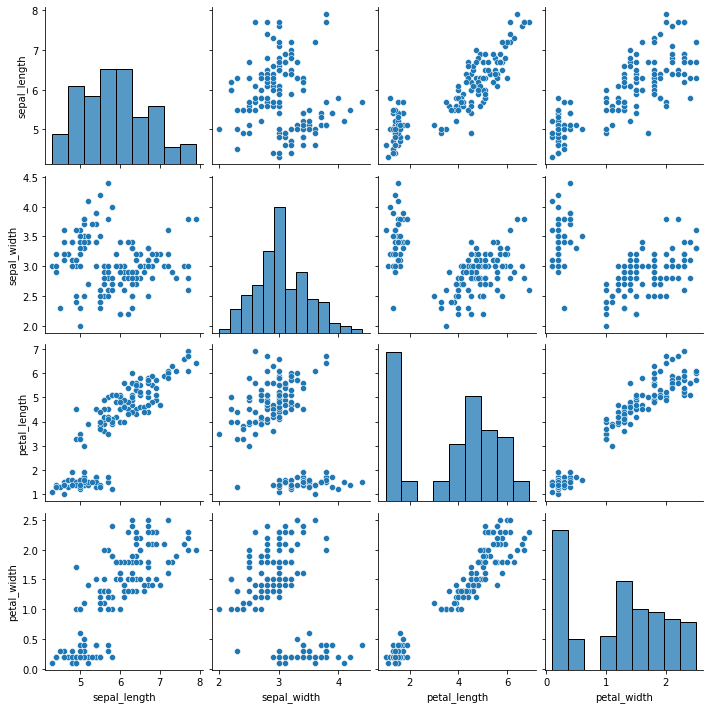

In [8]:
sns.pairplot(df)
plt.show()

#hue prametresi vermedigimizde yani tam target labeli olmayan bir dataya örnek

In [9]:
# K-Means bize 3 dediginde hemen ele almayip,bilen biriye sorup,3 ün dogru olup olmadigida sorulabilir

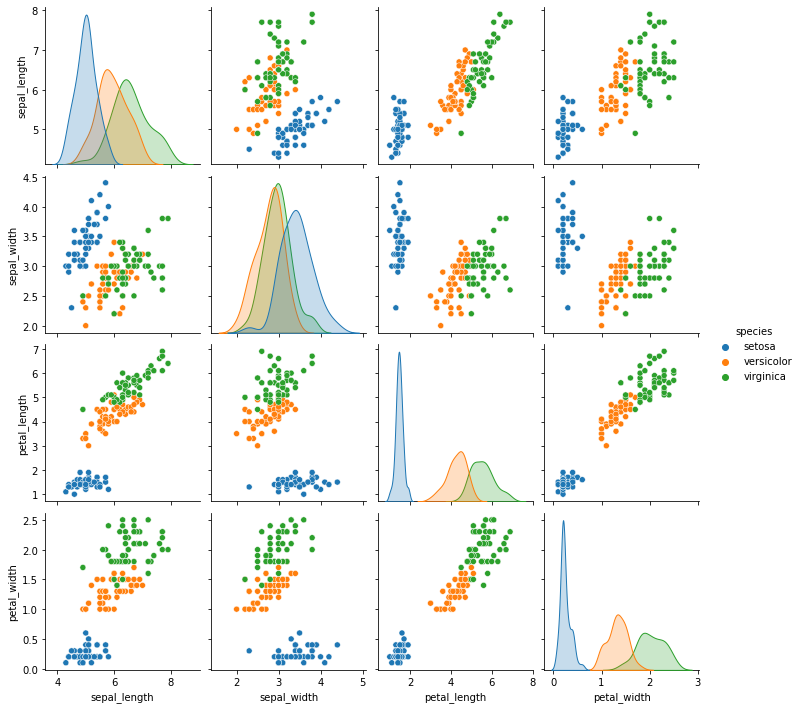

In [10]:
sns.pairplot(data=df, hue="species")
plt.show()

## Scaling Data

K means algoritmasında mutlaka scale gerekir. Ancak aynı birimde (cm cinsinden yazıldığından) verilmişse ki burada o şekilde hem scale hemde edilmemiş hali ile bakarız skorlara göre tercih yapabiliriz.

## K_Means Clustering

In [11]:
Z = df.copy()

In [12]:
X = Z.drop("species", axis = 1)  #sanki species feature'si yokmus gibi aliyorum

In [13]:
X.head()

#data bize bu sekilde target olmadan  geliyor.

#asagida predict yaparken su islemi yapcak,önce bu sekildeki sayilari alip,burdaki ortak özelliklere 
#göre onlara bir class nu,,arasi verecek,mesela scatterdaki bir bulut kümesine 1 diyecek 
# ama biz onun gercekte 1 olup olmadigini bilmiyoruz,en sonda croostab tablosunda bakabiliriz

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
X.shape

(150, 4)

# my Summary for K-Means

## Finding the best number of Cluster

### 1- with  ELBOW method

In [17]:
ssd = []

K = range(2,10)  #bunlar hem x eksenine gelecek sayilar,hemde bunlar k= burda for icinde yerine yaziliyor

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

#burda her bir deger icin model olusturuyor,ve her birinden inertia degeri alip,ssd ye atiyor
# ve asagida bu inertia'lar ile grafik olusturuyoruz 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

#n_cluster kac kümeye ayrilacagini söylüyor,default =8 mis

# n_init = class'lama yaparken,random olarak bir tane merkez seciyor,ve buna en yakin gruplari aliyor.
# eger buna 10 desek 10 farkli yerden merkez aliyor.bu iselmin daha bilincli hali asagidaki init islemi

# init= yogunlugun merkezine göre random merkezler seciyor,distence model zaten

#n_clusters = 8 default değer küme sayısını belirler
#init = 'k-means++' default olarak yoğunluk merkezlerini bularak centroids leri belirler. "random" seçeneği ise random observation secerek belirler
#n_init = 10 default değer sayısı kadar centroids lere göre küme oluşturup centroids leri tekrar belirler ve bu döngüyle optimum kümelemeyi yapar

In [211]:
K_means_model.fit_predict(X)  #bu sekilde ayni kodda yapilmasi tavsiye ediliyor,bundan sonrada K_means_model.labels_ yazsan da predict sonuclarini aliyoruz


#burda fit ve predict ayni satirda yapiliyor,eger bunlari ayni satirda yapmazsam bir asagidaki gibi yapiyorum

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

In [212]:
K_means_model.fit(X)  

#sadece fit yaparsan, ilerde fit_predict yaparsan hata veriyor,

KMeans(n_clusters=5, random_state=42)

In [213]:
K_means_model.inertia_

#bu bizim sample'larin merkez etrafina ne kadar sik dagildigini gösteren bir parametre,
#kücük olmasini isteriz

46.44618205128205

In [214]:
K_means_model.labels_  

 #prediction yapiyor yukardaki ile ayni sonuclari veriyor,   K_means_model.predict diyyerek cagiramiyoruz

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

In [215]:
X["Classes"] = K_means_model.labels_

#sütun olarak ekledim,default model ile calistik,burda aldigimiz predictleri sütun olarak ekliyorum

In [216]:
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


In [217]:
X.groupby('Classes').count()

#burda k=5 idi k=3 yapsan farkli sonuclar gelecek

,sepal_length,sepal_width,petal_length,petal_width
Classes,,,,
0,12,12,12,12
1,50,50,50,50
2,25,25,25,25
3,39,39,39,39
4,24,24,24,24


# Choosing The Optimal Number of Clusters

## Elbow metod

In [218]:
ssd = []

K = range(2,10)  #bunlar hem x eksenine gelecek sayilar,hemde bunlar k= burda for icinde yerine yaziliyor

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

#burda her bir deger icin model olusturuyor,ve her birinden inertia degeri alip,ssd ye atiyor
# ve asagida bu inertia'lar ile grafik olusturuyoruz    

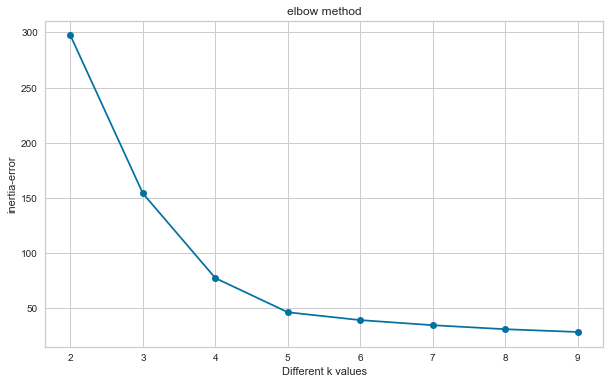

In [219]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")  #merkez etrafinda ne kadar sikilastigi birimi ile ilgili birsey
plt.title("elbow method") 
plt.show()


#keskin olarak ilk düstügü nokta k olarak kabul edilebilir

#inertia bir error metrigi,kücük olmasini istiyoruz
##inertia= etrafindaki sample'larin merkezin etrafinda ne kadar yogunlastigini gösteriyor

#3 ü görünce ,bunu kanun gibi hemen kabul etmiyoruz,

In [220]:
#asagida da yazdigi gibi k sayisi arttikca daha cok merkez olusacak,
# ve her merkez kendi etreafina yakin olan gözlemleri alacak,
# ve aslinda bütün noktalar kendine yakin olan merkeze göre degerlendirecek,
# yani inertia bulurken bu nokalarin merkeze olan uzakligini kareleri alinarak bir hesaplama yapiyordu,
# bunlarda merkez sayisi  arttigi icin ,merkeze yakin olacak ve kareleri toplami yani inertia düsük olacak ,
# ilk durumlara göre,mesele 2 veya 3 merkez olsaydi, 
# uzakta olanlarin kareleri toplami inertia yi baya arttiracakti,

# ama sinif sayisinin cok arttmasida anlamlandirmayi zorlastiriyor,
# mesela 10 sinif cikti bu sefer sen müsterileri anlamdirmakta zorlanacaksin

In [221]:
#k değerleri için inertia değerleri oluşturuluyor. 
#inertia k sayıdaki kümeler için kümelerin içerisinde yer alan veri 
#noktalarının centroids lere olan mesafelerinin karelerini toplayarak 
#her k sayıdaki küme için bir inertia değeri bulur. küme sayısı arttıkça 
#veri noktalarının centroids lere olan mesafesi kısalacağı için kareleri toplamı 
#olan inertia değeri düşer. minimum inertia merkez etrafında kümelenmiş iyi 
#küme grupları demektir.
#inertia değerinin keskin olarak düştüğü ilk nokta optimum k sayısı olarak alınır. 
#aşağıdaki ssd yani inertia değerlerine bakılırsa keskin düşüş k=2 ile k=3 arasındadır. 
#optimum k=3 olarak alınır.
#elbow tekniği ile bulunan optimum k değeri silhouette yöntemiyle 
#bulunan optimum k değeri ile karşışaltırılmalı
#inertia yerine distortion da kullanılabilir. farklı bir hesaplama yöntemi

In [222]:
# Depremde kac tane buyuk toplanma merkezi olmaliki insanlar kosarak
#  en kisa surede toplanma merkezine ulassin.
#  ne kadar uzarsa insanlarin ulasma suresi inertia artar

In [223]:
ssd # sum of squared distance

#burdan keskin düsüslere bakabiliriz,ilk keskin düsüs 3'te olmus,

[297.21519904931665,
 154.0945807978364,
 77.4108126984127,
 46.44618205128205,
 39.35425513506101,
 34.735520984278885,
 31.117176989677,
 28.60224837662338]

In [224]:
pd.Series(ssd).diff()


#(5, 2, 10, 1, 3)  #diff function elemanlari birbirinden cikarma islemine yariyor,sagdakini soldakinden cikariyor
# -3  8 -9  2


0           NaN
1   -143.120618
2    -76.683768
3    -30.964631
4     -7.091927
5     -4.618734
6     -3.618344
7     -2.514929
dtype: float64

In [225]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

#bu da düsüsler arasi mesafenin farkini veriyor,bir yukardakinin DataFrame hali

#ikide mesafelerin kareleri toplami yüksek, 3 e gelirken keskin bir düsüs olmus ,
# demekki bu merkezlenme daha iyi


#burda aslinda 2 yazan sey 3 degeridir cünkü yukaridaki grafik 2 den basliyor,yani 143 olan deger 3 icin olan degerr
#cünkü diff() function sagdakinden soldakini cikararak cevap buluyor

,0
1,NaN
2,143.120618
3,76.683768
4,30.964631
5,7.091927
6,4.618734
7,3.618344
8,2.514929


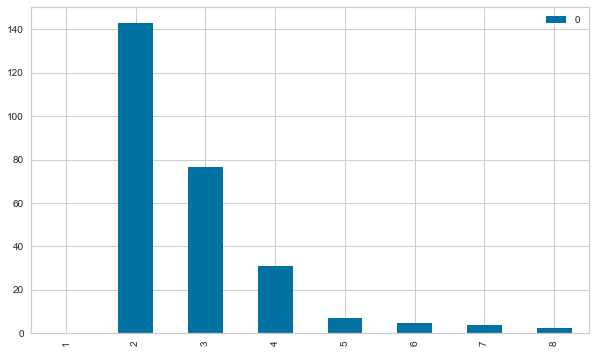

In [226]:
df_diff.plot(kind='bar');

#k=2 oldugu durumda mesefelerin birbirinden uzak oldugu anlamina geliyor
# k=3 oldugunda bir düsüs oluyor 152'den 80'lee düsmüs,ama burayi tam anlamadim?????

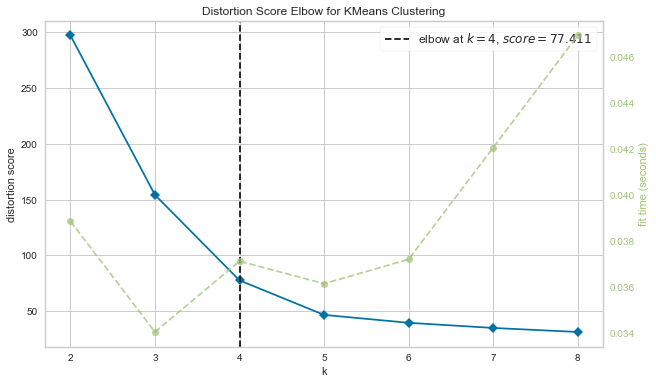

In [227]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)   #burda yeni model kurduk,yellow brick'te 4 dedi
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)   
visualizer.show();

#bu bana 4 diyor sert düsüs olarak, burda K-Means modelinin güvenirligi bu asamalarda azaliyor, 
# suan iki fikir cikiyor
# yellow brick ve elbow arasinda uyumsuzluk cikti

## Silhouette analysis  #süü-lüüü-veet enalayzııss

![](2022-10-25-14-02-26.png)

In [228]:
# burda a kümesinin icinden bir merkez seciliyor, ve kendine yakin olan örnekler arasindaki uzakliklar ayri ayri hesaplaniyor
# ve ortamalamasi aliniyor, buna a diyoruz

#sonra bu merkezin uzaktaki noktalara olan uzakliklari hesaplaniyor ve ortalamasi aliniyor,buna b diyoruz
#bunlari sekildeki gibi oranlayinca silhouette score ortaya cikiyor

#silhouette score -1 ile +1 arasinda degerler alir

#yani aslinda samplenin ne kadar o cluster'a ait oldugunu ölcen bir metrictir 
#ve o siniftakilerin birbirine ne kadar benzer bir sekilde dagildiginin göstergesidir

#score'un büyük cikmasini isteriz, ve ypksek score'larda grafikte üst kisimda olurlar 

![](2022-10-25-14-08-22.png)

![](2022-10-25-14-11-38.png)

In [229]:
# burdan görüldügü gibi merkeze yakin olan noktalarin cubuklari daha uzun, ve üst tarafa dogru toplanmislar
#uzak olanlarinki ise asagi taraflarda kalmis

In [230]:
from sklearn.metrics import silhouette_score


#datanin merkezinde nekadar yogunlastigini ve merkezlerin birbirinden ne kadar uzak 
# oldugunu gösterek optimim k degerini bulmamiza yardimci oluyor

In [231]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

#burda hoca 3 ü aldi, ama her calistirmada farkli sonuclar cikabiliyor, 1e nekadar yakinsa o kadar iyidir

#hocanin notebook'unda silhoutte 2 dedi, elbow 3 demis,yellow 4 demisti,
# inertia olan daha iyi denebiliyor


For n_clusters=2, the silhouette score is 0.6302043128172005
For n_clusters=3, the silhouette score is 0.6715780817387732
For n_clusters=4, the silhouette score is 0.6117353392436369
For n_clusters=5, the silhouette score is 0.6314166907607776
For n_clusters=6, the silhouette score is 0.49813123023773054
For n_clusters=7, the silhouette score is 0.44505814105575325
For n_clusters=8, the silhouette score is 0.43574984654488275


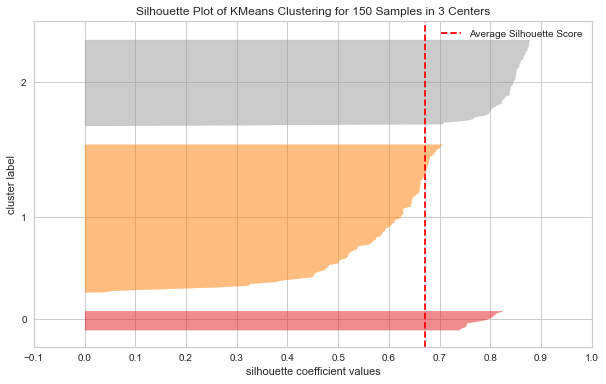

In [232]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# burda en iyi ayrilan sinif 2ci class,ama her calistirmada degerler farkli
#cünkü yukarda da gördük, noktalarin merkeze uzakligi yakin ise cubuklar uzun ve üst tarafta kaliyorlar

Data noktalarının centroids ler etrafında ne kadar yoğunlaştığını gösterirken diğer kümelerden ne kadar uzakta olduğunuda gösterir. hem inertia değerini kullanır hemde diğer kümelerle olan mesafeyi alır.
Silhouette Medtodunda Silhouette katsayısı kümelemenin ne kadar başarılı yapıldığını gösterir. -1 ile 1 arasında değer alır. -1 kümelerin veri noktalarını iyi ifade edemediği grupları iyi oluşturamadığı grupların yanlış oluşturulduğunu ifade eder. 0 ile kümelerin birbirleriyle alakasız bir şekilde oluşturulduğunu, aralarındaki mesafelerin anlamsız olduğunu ifade eder. 1 ise kümelerin veri noktalarını tamamen ayrıştıracak şekilde oluşturulduğunu yani kümelerin doğru bir şekilde oluşturulduğunu ifade eder. 1 e ne kadar yakınsa o kadar başarılıdır.

## Building the model based on the optimal number of clusters

In [ ]:
#burdan predict_cluster diye bir features olusturacagiz ve onun alip en sonda lineplot
#  ile hangi featureslerin daha iyi ayristirdigini görebilecegim

In [233]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

#n_cluster=3 deyip model kurdum,cünkü yukarida 3 ün iyi bir sayi olduguna karar verdim,
# aslinda bu asamada uzman görüsü ile birlikte karar verilebilir

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [234]:
model.labels_   #buda predict sonuclarini veriyor

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [235]:
clusters = model.labels_  #bunu bir variableye atarken labels_  olarak atiyoruz

In [236]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [237]:
X["predicted_clusters"] = clusters

#cluester=3 göre aldigimiz tahminleri buraya aliyoruz

#bu Classes olanlar en yukarida buldugumuz k=5 icin buldugumuz degerlerdi
 #best modelimizin predict sonuclarini sütn olarak veriyoruz

In [238]:
X["predicted_clusters"].value_counts()

#bu degerler bizim n_cluster=3 aldigimiz degerler oldgu icin siniflamada 3 cesit oldu
# en yukarida ilk yaptigimizda n_cluster=5 oldugu icin 5 sinif cikarmisti

1    87
2    51
0    12
Name: predicted_clusters, dtype: int64

In [239]:
X

,sepal_length,sepal_width,petal_length,petal_width,Classes,predicted_clusters
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4,1
146,6.3,2.5,5.0,1.9,3,1
147,6.5,3.0,5.2,2.0,4,1
148,6.2,3.4,5.4,2.3,4,1


In [240]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [241]:
df["predicted_clusters"] = clusters

In [242]:
df.head(60)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
5,5.4,3.9,1.7,0.4,setosa,2
6,4.6,3.4,1.4,0.3,setosa,2
7,5.0,3.4,1.5,0.2,setosa,2
8,4.4,2.9,1.4,0.2,setosa,2
9,4.9,3.1,1.5,0.1,setosa,2


In [243]:
ct = pd.crosstab(df.predicted_clusters, df.species) # ayrılan klaslara göre tahmin ve labels karşılaştırıyor.
ct
# 0. clusters hepsini dogru tahmin etmis
# 1.   ''     1 icin kötü yapmis
# 2.   ''     50 tanesini bir class'a göre dagitmis
# toplamda 16 hata yapmış

#crosstab fonksiyonu ile bu degeri aliyoruz,asagi dogru okuyoruz verileri,soldan okursak ise, 
# kendi yaptigi tahminleri görüyoruz

# setosa=2 gibi gözüküyor,yukaridaki df'ten


species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,0,12
1,0,49,38
2,50,1,0


## Adjust Rand Score

In [244]:
from sklearn.metrics import adjusted_rand_score

In [245]:
df_end = df
df_end

#burda bunlar ciktiktan sonra uzmanlar veya sen Domain knowladge ile degerlendirmen gerekir

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [246]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters)


# burda da rmse'deki gibi bir cezalandirma mantigi var
# en iyi scorun 1 olduguve ortalama üzerinde olan score'da kabul edebiliriz

0.5536041211913872

## Visualization Clusters

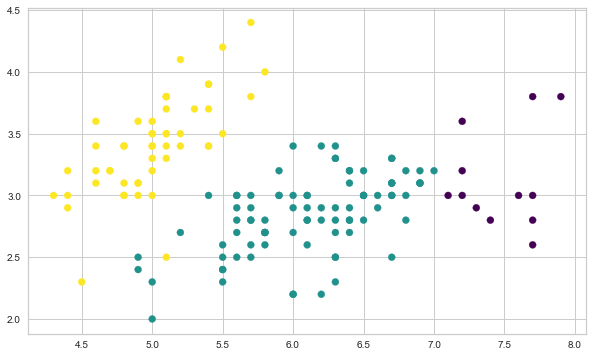

In [247]:
plt.scatter(df["sepal_length"], df["sepal_width"], c = df.predicted_clusters, cmap = "viridis");

#burda ikili features secip,scatter bakiyoruz

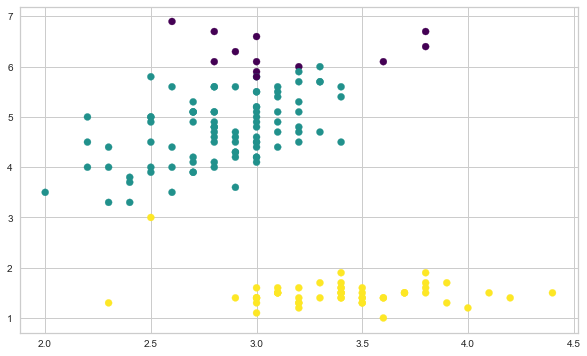

In [248]:
plt.scatter(df["sepal_width"], df["petal_length"], c = df.predicted_clusters, cmap = "viridis");

In [249]:
centers = model.cluster_centers_
centers

#bu degerler herbir features'in koordinati diyebiliriz
#4 features'imiz var

array([[7.47500000e+00, 3.12500000e+00, 6.30000000e+00, 2.05000000e+00,
        4.44089210e-16],
       [6.10804598e+00, 2.84137931e+00, 4.73563218e+00, 1.63103448e+00,
        3.00000000e+00],
       [5.00784314e+00, 3.40980392e+00, 1.49215686e+00, 2.62745098e-01,
        1.01960784e+00]])

In [250]:
centers[:,0] # centers of sepal_length feature

array([7.475     , 6.10804598, 5.00784314])

In [251]:
centers[:,1] # centers of sepal_width feature

array([3.125     , 2.84137931, 3.40980392])

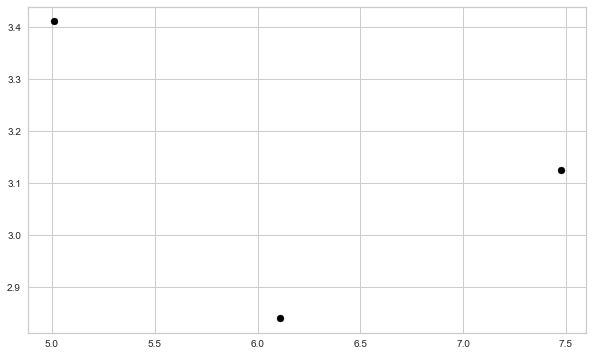

In [252]:
plt.scatter(centers[:,0], centers[:,1], c = "black");

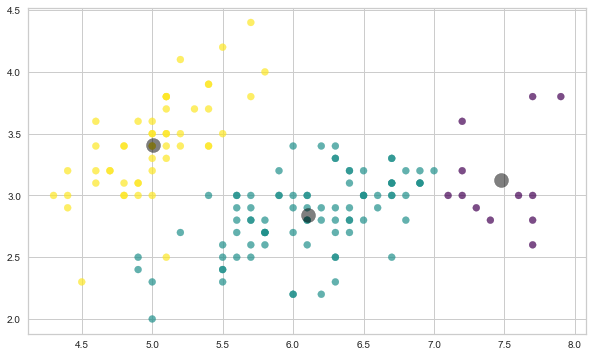

In [253]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#burda 2 features'e göre dizmis,sepal length ve sepal width

## Remodeling according to discriminating features

In [254]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


In [255]:
df.iloc[:, [0,1,2,3,5]].head()   #species features'ini almamak icin cünkü o bizim target features'imiz

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [256]:
clus_pred = df.iloc[:, [0,1,2,3,5]].groupby("predicted_clusters").mean().T
clus_pred



predicted_clusters,0,1,2
sepal_length,7.475,6.108046,5.007843
sepal_width,3.125,2.841379,3.409804
petal_length,6.300,4.735632,1.492157
petal_width,2.050,1.631034,0.262745


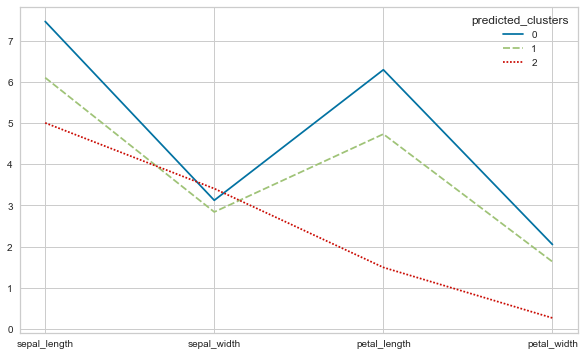

In [257]:
sns.lineplot(data = clus_pred);

# 3ünün yaklastigi yer grift olan yer,
#en iyi ayrismanin oldugu yer  petal length

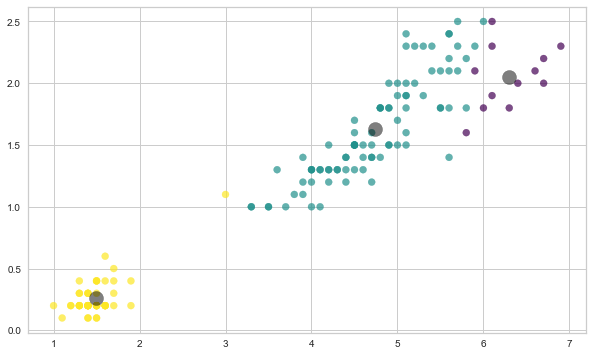

In [258]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

#yukardan petalin iyi ayristirdigini anlayip burda kullaniyorum

In [259]:
X2 = X.iloc[:, [2,3]]   
X2

#petal_length ve petal_width iyi ayristirdiklrirni belirledigim icin,data olarak sadece bu iki featuresi aliyorum,cünkü bu kriterlere göre ayrim yapmasini istiyorum
#simdiye kadar kac sinif olusturmam gerektigini ve hangi featresler ile daha iyi tahmin edebilecegimi belirlerdim

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Elbow metod

In [260]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

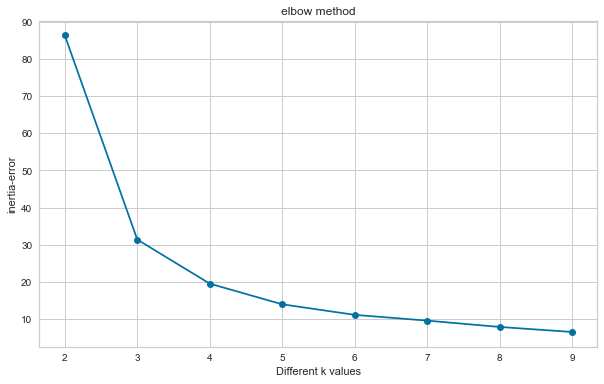

In [261]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

#3 cluster daha iyi gözüküyor

In [262]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,55.018861
3,11.888358
4,5.566092
5,2.843522
6,1.555836
7,1.707064
8,1.353991


<AxesSubplot:>

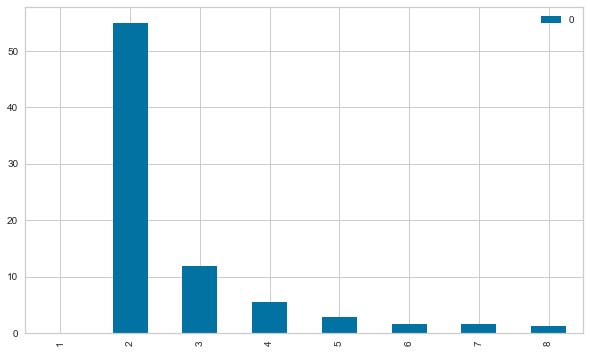

In [263]:
df_diff.plot(kind='bar')

In [264]:
X2.head()  #bunu asagida yellowbrick'in icine koyuyor

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


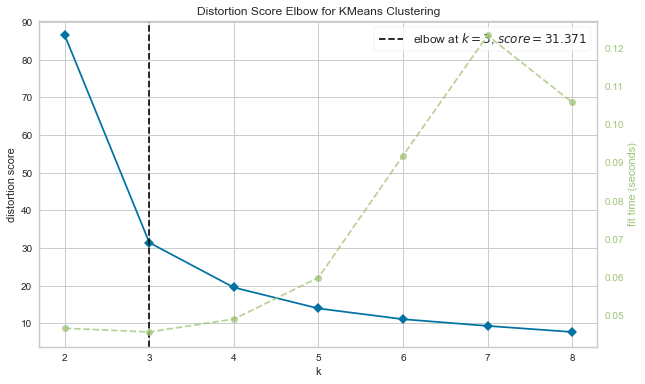

In [265]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer,icine X2 datasiniy yani icinde 
visualizer.show();

#burda yellow brick'te 3 olarak destekliyor

## Silhouette analysis

In [266]:
#burdada X2 datasini icine koyuyor

In [267]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

    #ama burda 2 cikti

For n_clusters=2, the silhouette score is 0.7653904101383076
For n_clusters=3, the silhouette score is 0.6604800085022658
For n_clusters=4, the silhouette score is 0.6127580795614039
For n_clusters=5, the silhouette score is 0.588373271407563
For n_clusters=6, the silhouette score is 0.5767097836592128
For n_clusters=7, the silhouette score is 0.5640984344798261
For n_clusters=8, the silhouette score is 0.5902255629729695


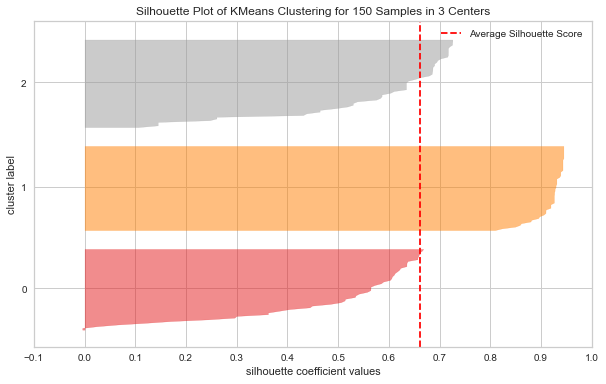

In [268]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

In [269]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [270]:
X2["species"] = df["species"]

In [271]:
X2["predicted_clusters"] = final_model.labels_

In [272]:
X2.head()

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Score

In [273]:
adjusted_rand_score(X2.species, X2.predicted_clusters)

0.8856970310281228

## Compare results

In [274]:
# crosstab for 2 features
pd.crosstab(X2.predicted_clusters, X2.species)

#asagidaki bütün featuresler icin cikan sonuclardi,
# bu ise sadece en iyi ayrismanin yapildigi petal_length degiskenine göre alinan degerler

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [275]:
# ct for all features
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,0,12
1,0,49,38
2,50,1,0


## Prediction cluster of new data

In [276]:
new_data = [[1.7, 0.2]]

#burda yeni datamizin sadece petal_length degerlerini veriyoruz 

In [277]:
final_model.predict(new_data)

#bu yeni datayi simdi tahminde bulunuyor.


array([1], dtype=int32)

In [278]:
# bu methodta hangi features'ler ile gitmem gerektigine karar vermeliyiz
# features selection yaptik
#elimizdeki bir cok seyi toplayip,3 ile yapmak gerektigine karar verdi,ve sonra model kurup,ve 
#hangi featuresleri almanin en iyi isi cikaracagina baktik